<a href="https://colab.research.google.com/github/Gulwalishah/Piece-Wide-Codes/blob/main/Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-f741106c1d60>:23: RuntimeWarning: divide by zero encountered in divide
  y_values_in_interval = 1 / x_values_in_interval
<ipython-input-4-f741106c1d60>:43: RuntimeWarning: divide by zero encountered in divide
  y_values_for_1_over_x = 1 / x_values_for_1_over_x  # Calculate 1/x


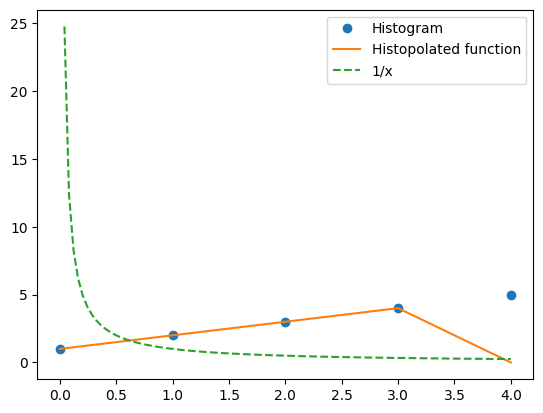

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def histopolate(x, z, a, b):
    if not isinstance(x, np.ndarray) or not isinstance(z, np.ndarray):
        raise TypeError("x and z must be numpy arrays.")
    if len(x) != len(z):
        raise ValueError("x and z must have the same length.")
    if a >= b:
        raise ValueError("a must be less than b.")

    S = np.zeros(x.shape)

    for i in range(len(x) - 1):
        m = (z[i + 1] - z[i]) / (x[i + 1] - x[i])
        b_i = z[i] - m * x[i]

        # Apply the condition for indexing within the current interval
        interval_mask = (x >= x[i]) & (x < x[i + 1])

        # Calculate 1/x within the current interval
        x_values_in_interval = x[interval_mask]
        y_values_in_interval = 1 / x_values_in_interval

        # Histopolate the values of 1/x
        S[interval_mask] = m * x_values_in_interval + b_i

    return S

# Example usage:
x = np.array([0, 1, 2, 3, 4])
z = np.array([1, 2, 3, 4, 5])
a = 0
b = 4

S = histopolate(x, z, a, b)

plt.plot(x, z, 'o', label='Histogram')
plt.plot(x, S, '-', label='Histopolated function')

# Calculate and plot 1/x
x_values_for_1_over_x = np.linspace(a, b, 100)  # Generate x values for 1/x
y_values_for_1_over_x = 1 / x_values_for_1_over_x  # Calculate 1/x

plt.plot(x_values_for_1_over_x, y_values_for_1_over_x, '--', label='1/x')

plt.legend()
plt.show()
